In [237]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

col_pal = sns.color_palette()

In [239]:
df = pd.read_excel('dataset.xlsx')
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [241]:
df.duplicated().sum()

64

In [242]:
df = df.drop_duplicates()

In [243]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [244]:
df.dropna(inplace=True)
df.shape

(52520, 11)

In [245]:
df["Horas"] = df["Hour"].apply(lambda x: str(x).replace(".0", "").zfill(4))
df["Horas"] = df["Horas"].apply(lambda x: (x[:2]) + ":" + (x[2:4]))
df["Horas"] = pd.to_datetime(df["Horas"], format='%H:%M').dt.time

In [246]:
day_names = {1: "Segunda-feira", 2: "Terça-feira", 3: "Quarta-feira", 4: "Quinta-feira", 5: "Sexta-feira", 6: "Sábado", 7: "Domingo"}

# Em seguida, você pode usar a função apply para aplicar a transformação:
df["Dias"] = df["Day"].apply(lambda x: day_names[x])

# Agora, para mudar os nomes para os nomes dos fins de semana (Sábado e Domingo), você pode fazer o seguinte:
def weekend_name(day_number):
    if day_number == 6:
        return "Sábado"
    elif day_number == 7:
        return "Domingo"
    else:
        return day_names[day_number]

df["Dias"] = df["Day"].apply(weekend_name)

In [247]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Horas,Dias
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,00:00:00,Sexta-feira
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,15:00:00,Sábado
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,23:00:00,Sábado
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,09:00:00,Domingo
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,11:00:00,Domingo


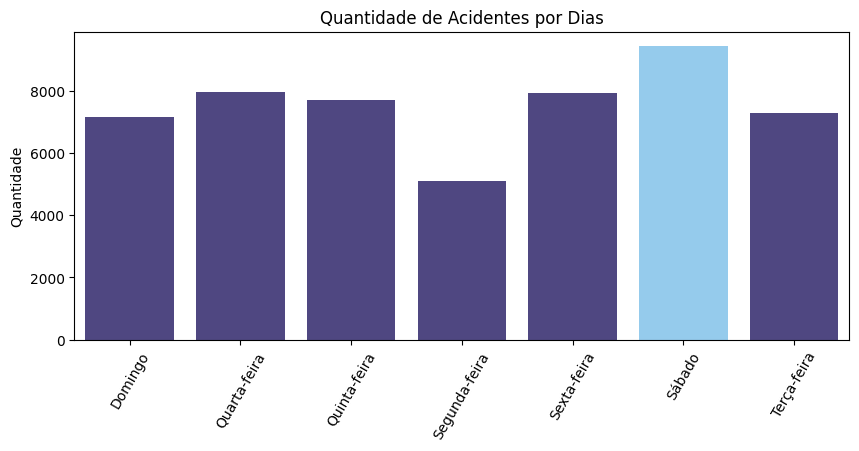

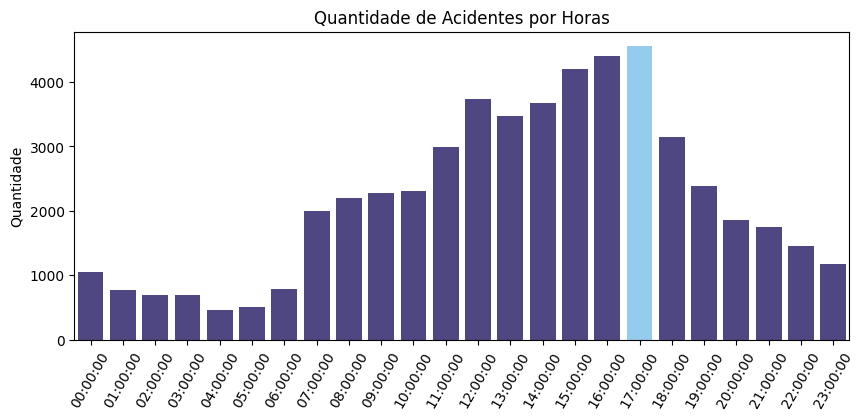

In [248]:
group_list = ["Dias", "Horas"]

for i in group_list:
    grouped = df.groupby(i)[i].count().reset_index(name="Quantidade")

    plt.figure(figsize=(10,4))
    cols = ["DarkSlateBlue" if (i < max(grouped["Quantidade"])) else "LightSkyBlue" for i in grouped["Quantidade"]]
    sns.barplot(data=grouped, x=i, y="Quantidade", palette=cols)
    plt.title(f"Quantidade de Acidentes por {i}")
    plt.xticks(rotation=60)
    plt.xlabel("")
    plt.show()

In [249]:
df = df.rename(columns={'Weekend?': 'Fim de Semana'})
df['Fim de Semana'] = df['Fim de Semana'].map({'Weekend': 'Fim de Semana', 'Weekday': 'Durante a Semana'})


grouped_week = df.groupby("Fim de Semana")["Fim de Semana"].count().reset_index(name="Quantidade")
grouped_week

,Fim de Semana,Quantidade
0,Durante a Semana,39647
1,Fim de Semana,12873


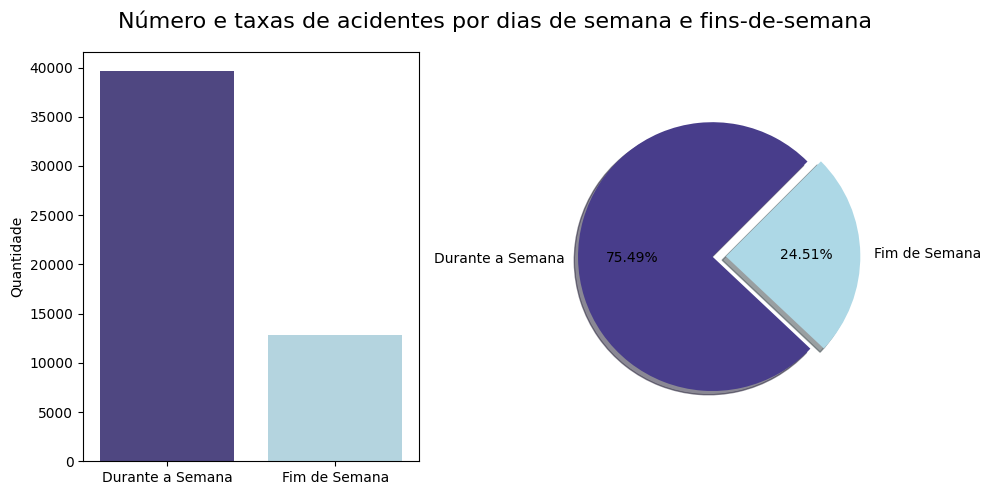

In [250]:
col_pal = ["#483D8B", "#ADD8E6"]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cols = [col_pal[0], col_pal[1]]
sns.barplot(x=grouped_week["Fim de Semana"], y=grouped_week["Quantidade"], palette=cols)
plt.xlabel("")
plt.subplot(1,2,2)
plt.pie(x=grouped_week["Quantidade"], labels=grouped_week["Fim de Semana"], shadow=True,
        explode=[0.1, 0], startangle=45, autopct='%0.2f%%', colors=cols)
plt.suptitle("Número e taxas de acidentes por dias de semana e fins-de-semana", fontsize=16)
plt.tight_layout()
plt.show()

In [251]:
translations = {
    '1-Car': '1 Carro',
    '2-Car': '2 Carros',
    '3+ Cars': '3+ Carros',
    'Bus': 'Ônibus',
    'Cyclist': 'Ciclista',
    'Moped/Motorcycle': 'Motocicleta',
    'Pedestrian': 'Pedestre'
}

df['Collision Type'] = df['Collision Type'].map(translations)

df.rename(columns={'Collision Type': 'Tipo de Colisão'}, inplace=True)

grouped_collision_type = df.groupby("Tipo de Colisão").size().reset_index(name="Quantidade")


Text(0.5, 1.0, 'Número por tipos de acidentes')

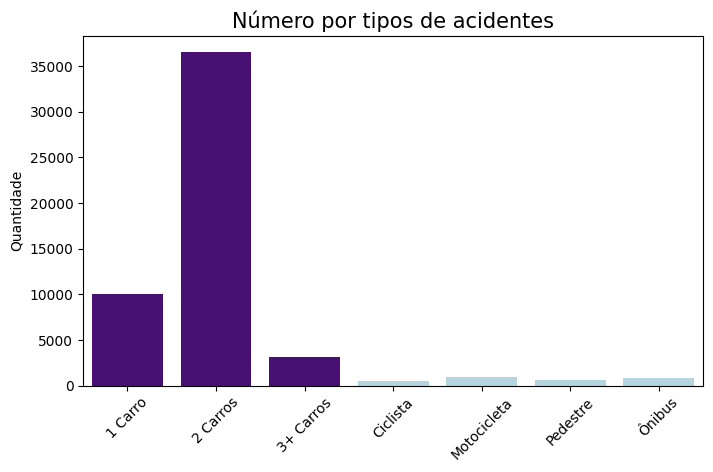

In [252]:
dark_purple = '#4B0082'  # roxo escuro
light_blue = '#ADD8E6'   # azul claro

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
cols = [dark_purple, dark_purple, dark_purple, light_blue, light_blue, light_blue, light_blue]
sns.barplot(x=grouped_collision_type["Tipo de Colisão"], y=grouped_collision_type["Quantidade"], palette=cols)
plt.xlabel("")
plt.xticks(rotation=45)
plt.title("Número por tipos de acidentes", fontsize=15)


In [253]:
translations1 = {
    'Fatal': 'Fatal',
    'Incapacitating': 'Incapacitado',
    'No injury/unknown': 'Sem Lesão',
    'Non-incapacitating': 'Não Incapacitado',
}

df['Injury Type'] = df['Injury Type'].map(translations1)

df.rename(columns={'Injury Type': 'Tipo de Lesão'}, inplace=True)

grouped_injury_type = df.groupby("Tipo de Lesão").size().reset_index(name="Quantidade")

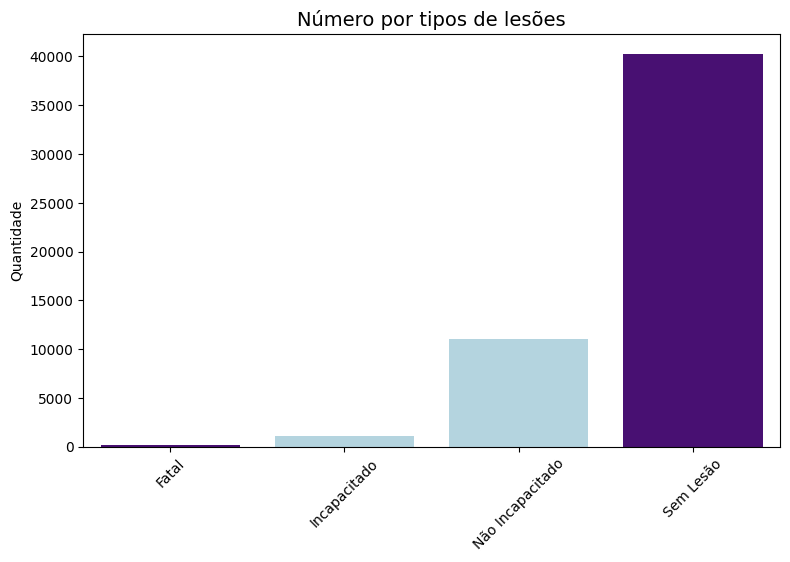

In [254]:
# Definindo as cores
dark_purple = '#4B0082'  # roxo escuro
light_blue = '#ADD8E6'   # azul claro

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
cols = [dark_purple, light_blue, light_blue, dark_purple]
sns.barplot(x=grouped_injury_type["Tipo de Lesão"], y=grouped_injury_type["Quantidade"], palette=cols)
plt.xlabel("")
plt.xticks(rotation=45)
plt.title("Número por tipos de lesões", fontsize=14)

plt.tight_layout()
plt.show()


In [255]:
translations2 = {
    'FAILURE TO YIELD RIGHT OF WAY': 'NÃO CEDÊNCIA DE PASSAGEM',
    'FOLLOWING TOO CLOSELY': 'SEGUIR DE PERTO',
    'OTHER (DRIVER) - EXPLAIN IN NARRATIVE': 'OUTRO (CONDUTOR) - EXPLICADO NA NARRATIVA',
    'UNSAFE BACKING': 'RÉ INCORRETA',
    'RAN OFF ROAD RIGHT': 'SAIU DA ESTRADA',
    'DISREGARD SIGNAL/REG SIGN': 'DESRESPEITAR O SINAL/REGULAMENTO',
    'SPEED TOO FAST FOR WEATHER CONDITIONS': 'VELOCIDADE MUITO ALTA PARA CONDIÇÕES CLIMÁTICAS',
    'IMPROPER TURNING': 'VIRADA INCORRETA',
    'ANIMAL/OBJECT IN ROADWAY': 'ANIMAL/OBJETO NA ESTRADA',
    'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE': 'CONDUTOR DISTRAÍDO - EXPLICADO NA NARRATIVA',
}

df['Primary Factor'] = df['Primary Factor'].map(translations2)

df.rename(columns={'Primary Factor': 'Causa do Acidente'}, inplace=True)

grouped_primary_factor = df.groupby("Causa do Acidente").size().reset_index(name="Quantidade")
grouped_primary_factor = grouped_primary_factor.sort_values(by="Quantidade", ascending=False).head(10)

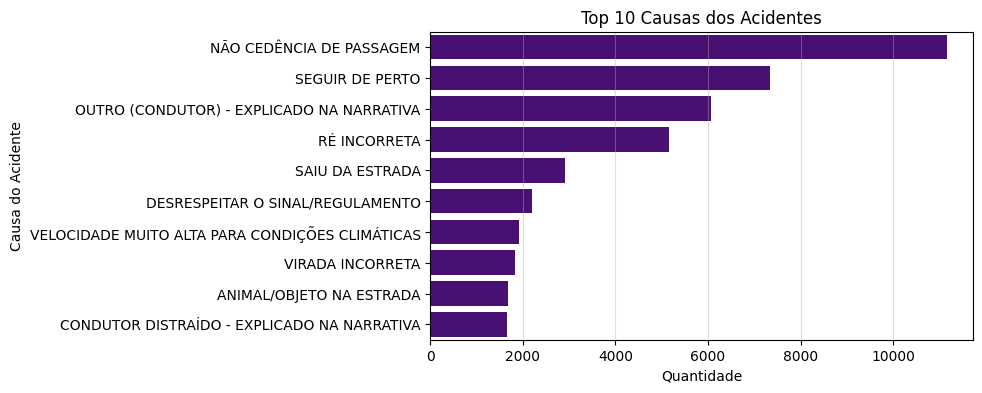

In [256]:
# Definindo as cores
dark_purple = '#4B0082'  # roxo escuro
light_blue = '#ADD8E6'   # azul claro

plt.figure(figsize=(7, 4))
sns.barplot(data=grouped_primary_factor, x="Quantidade", y="Causa do Acidente", color=dark_purple)
plt.grid(axis="x", alpha=0.4)
plt.title("Top 10 Causas dos Acidentes")
plt.show()